In [243]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [244]:
data = pd.read_csv("data/weatherHistory.csv")

In [245]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [246]:
data['DateTime'] = pd.to_datetime(data['Formatted Date'], utc=True)

In [247]:
data['Year'] = data['DateTime'].dt.year

In [248]:
data['DoY'] = data['DateTime'].dt.dayofyear

In [249]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,DateTime,Year,DoY
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-03-31 22:00:00+00:00,2006,90
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-03-31 23:00:00+00:00,2006,90
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01 00:00:00+00:00,2006,91
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01 01:00:00+00:00,2006,91
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01 02:00:00+00:00,2006,91


In [250]:
Average_Temperature = data.groupby(['DoY', 'Year'])['Temperature (C)'].mean().reset_index()
Average_Temperature.rename(columns= {'Temperature (C)' : 'Avg_Temperature'}, inplace = True)
Average_Temperature

,DoY,Year,Avg_Temperature
0,1,2006,4.075000
1,1,2007,3.806713
2,1,2008,-5.663194
3,1,2009,-4.850926
4,1,2010,7.807407
...,...,...,...
4014,365,2015,-4.304861
4015,365,2016,0.117593
4016,366,2008,-6.218056
4017,366,2012,-3.249306


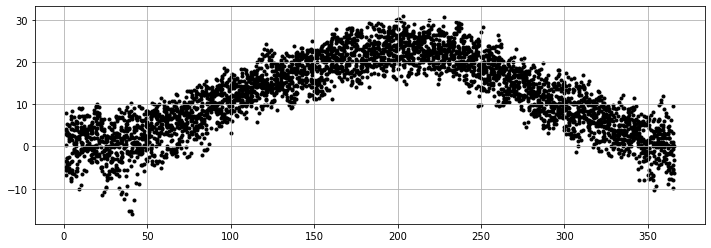

In [251]:
plt.figure(figsize=(12,4))
plt.grid()
plt.scatter(Average_Temperature['DoY'], Average_Temperature['Avg_Temperature'], marker='.', c='k')
plt.show()

In [252]:
X_train, X_test, Y_train, Y_test = train_test_split(Average_Temperature['DoY'], Average_Temperature['Avg_Temperature'], shuffle=True)

In [253]:
# perceptron class
class perceptron:
  
  def __init__(self):
    pass
    
  def fit(self, Xtrain, Ytrain):
    # init
    self.w = np.random.rand(1, 1)
    self.b = np.random.rand(1, 1)
    
    # Hyper parameters
    epochs = 100
    lr_w = 0.00000001
    lr_b = 0.05
       
    Errors= []
    self.Errors_test= []
    for epoch in range(epochs):
      for i in range(Xtrain.shape[0]):
        x = Xtrain[i, :]
        y = Ytrain[i]
        y_pred = np.matmul(x, self.w) + self.b
        e = y - y_pred
        error = np.mean(e)
        
        # update
        self.w += lr_w * error * x
        self.b += lr_b * error
        Y_pred = np.matmul(Xtrain,  self.w) + self.b
        
        Errors.append(np.mean(Ytrain - Y_pred))
    np.save('weights.npy', [self.w, self.b])
    return Y_pred, Errors    

  def predict(self, X_test):
    y_pred = np.matmul(X_test, self.w) + self.b
    return y_pred

  def evaluate(self, X_test, Y_test):
    Y_pred_eval = self.predict(X_test)
    self.Errors_test.append(np.mean((Y_test - Y_pred_eval)))
    eval = (Y_test == Y_pred_eval).sum() / len(Y_test)

    print(Y_test,' and ', Y_pred_eval)
    return eval, Y_pred_eval,self.Errors_test  
   


In [254]:
X_train = X_train.to_numpy()
X_train = X_train.reshape(-1, 1)
Y_train = Y_train.to_numpy()
Y_train = Y_train.reshape(-1, 1)

X_test = X_test.to_numpy()
X_test = X_test.reshape(-1, 1)
Y_test = Y_test.to_numpy()
Y_test = Y_test.reshape(-1, 1)

In [255]:
pred = perceptron()
Y_predf, Errorsf = pred.fit(X_train, Y_train)


In [256]:
acc, Ypred, ErrorT = pred.evaluate(X_test, Y_test)

[[ 9.64351852]
 [ 1.0287037 ]
 [ 4.54212963]
 ...
 [ 2.23287037]
 [12.11875   ]
 [16.91111111]]  and  [[12.74019184]
 [12.21749369]
 [15.74235558]
 ...
 [11.97624839]
 [16.02380843]
 [13.24948748]]


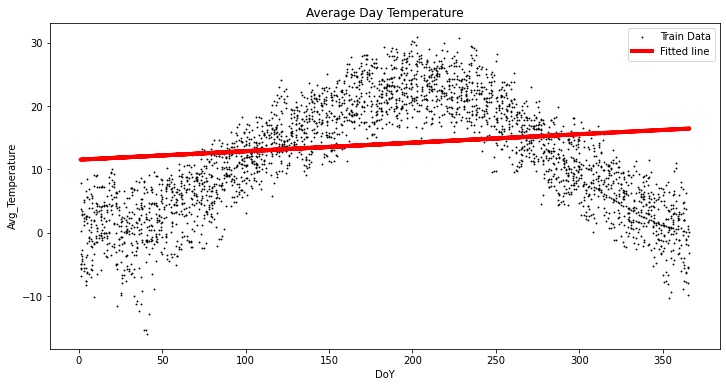

In [257]:
plt.figure(figsize=(12, 6))
plt.scatter(X_train, Y_train, marker='.', c='k', s=3, label='Train Data')
plt.plot(X_train, Y_predf, color='red', lw=4, label='Fitted line')
plt.xlabel('DoY')
plt.ylabel('Avg_Temperature')
plt.title('Average Day Temperature')
plt.legend()
plt.show()

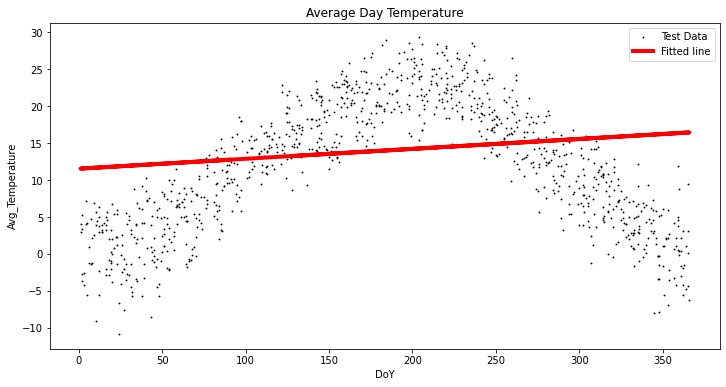

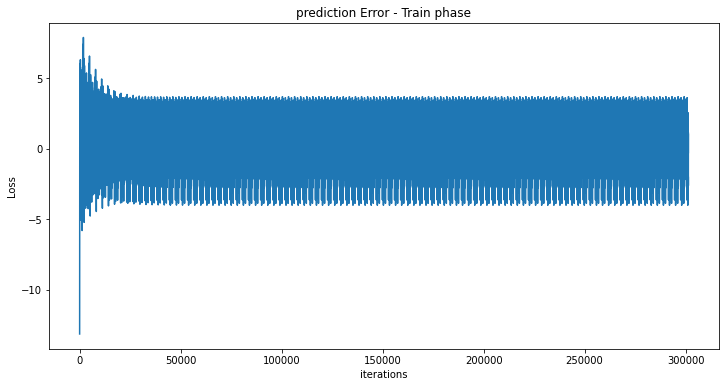

In [262]:
plt.figure(figsize=(12, 6))
plt.scatter(X_test, Y_test, marker='.', c='k', s=3, label='Test Data')
plt.plot(X_test, Ypred, color='red', lw=4, label='Fitted line')
plt.xlabel('DoY')
plt.ylabel('Avg_Temperature')
plt.title('Average Day Temperature')
plt.legend()

plt.figure(figsize=(12, 6))
plt.plot(Errorsf)
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.title('prediction Error - Train phase') 
plt.pause(0.3)
plt.show()
    

In [260]:
# prediction
pred.predict([150])


array([[13.54434285]])

In [261]:
Save_weight_bias = np.load('weights.npy')
Save_weight_bias

array([[[ 0.01340252]],

       [[11.53396534]]])